<a href="https://colab.research.google.com/github/kashifkhan9555/Yes_Bank_Closing_price_prediction/blob/main/Yes_Bank_Closing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Yes_Bank_Closing_price_prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** kashif khan


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/kashifkhan9555/Yes_Bank_Closing_price_prediction/blob/main/Yes_Bank_Closing_price_prediction.ipynb

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [84]:
# Import Libraries
import pandas as pd
import numpy as np
from numpy import math

#Importing libraries for Data Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

#Importing Machine Learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import missingno as msno
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [4]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/MyDrive/yes bank project/data_YesBank_StockPrices.csv')

### Dataset First View

In [6]:
# Dataset First Look
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

<Axes: >

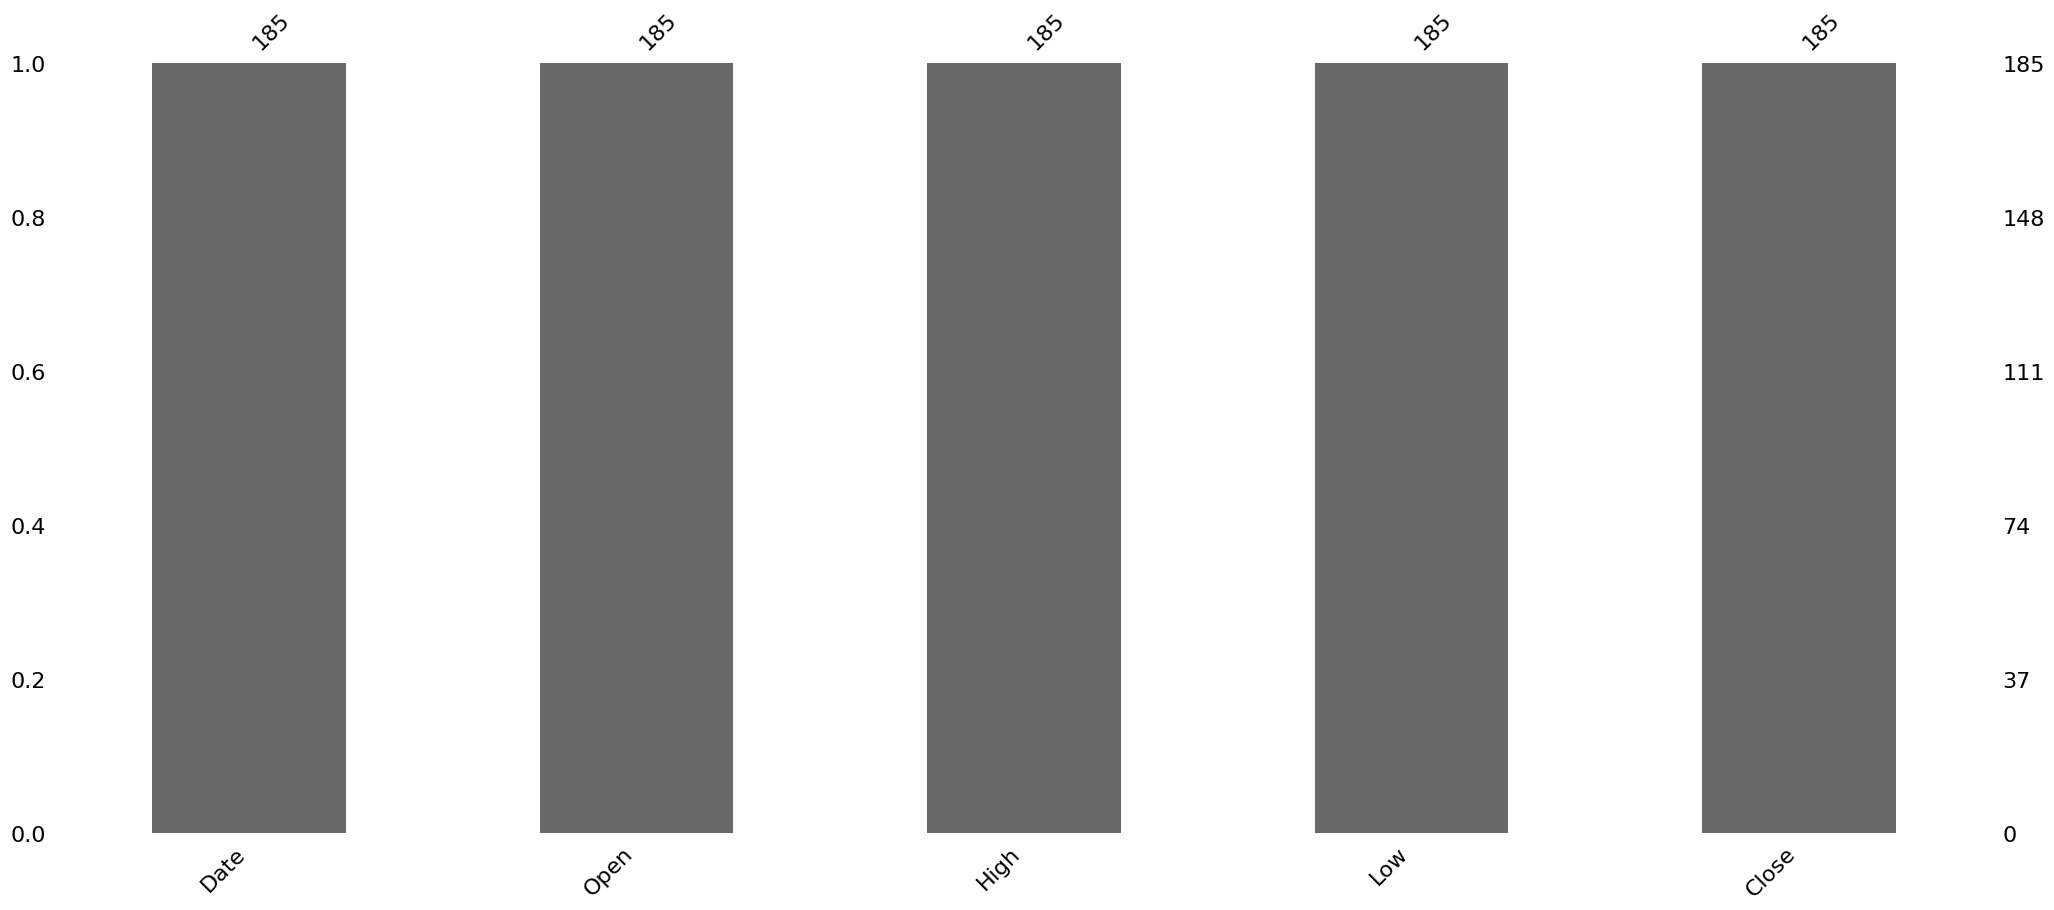

In [11]:
# Visualizing the missing values
msno.bar(df)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}")


Unique values for Date: ['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 'Mar-14' 'Apr-14' 'May-14'

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
from time import strptime
# Write your code to make your dataset analysis ready.
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<ipython-input-24-6a156b15a55b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Close'],color="orange")


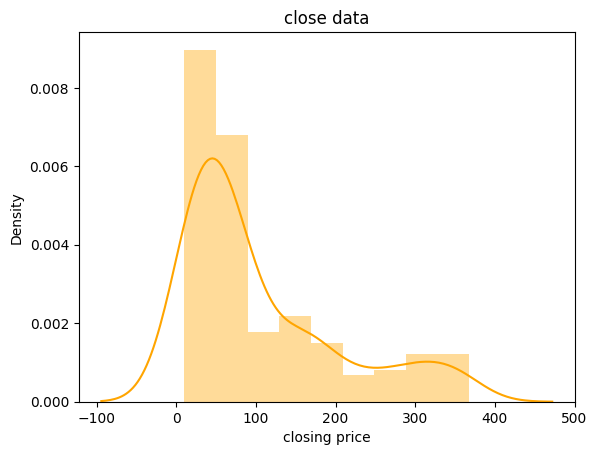

In [ ]:
# Chart - 1 visualization code
# dependant variable 'closing object'
plt.figsize=(18,15)
sns.distplot(df['Close'],color="orange")
plt.title('close data')
plt.xlabel('closing price')
plt.show()

##### to make it normal distribution apply log transformation

<ipython-input-25-dc5d31007caf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['Close']), color = 'orange')


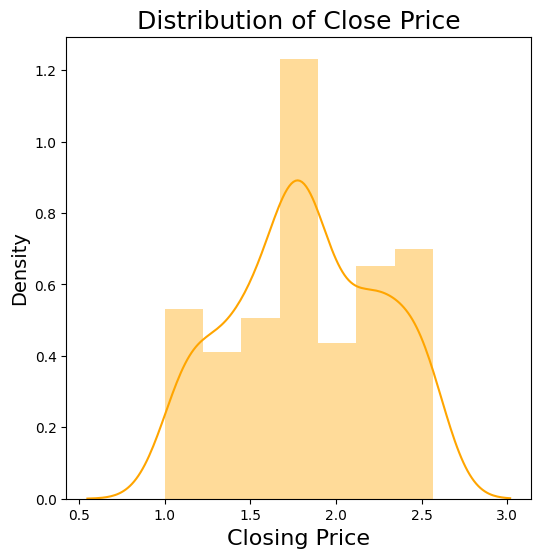

In [ ]:
# Distribution plot of closing price For applying log transformation

plt.figure(figsize = (6,6))
sns.distplot(np.log10(df['Close']), color = 'orange')
plt.title('Distribution of Close Price', fontsize=18)
plt.xlabel('Closing Price', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

<ipython-input-26-51eb5c1470b1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Open'], color = 'Red')


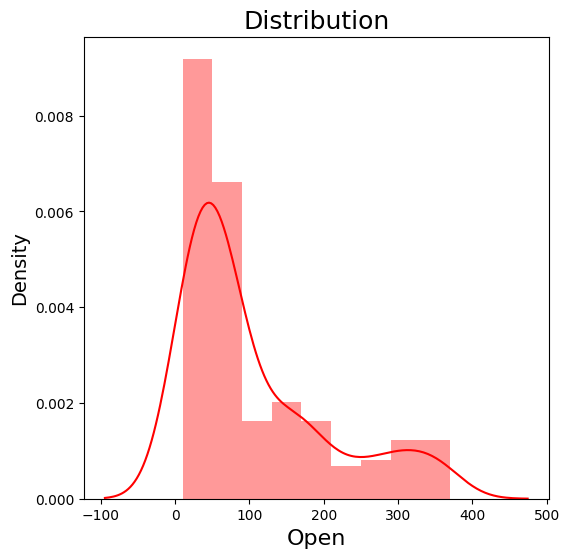

In [ ]:
# ploting for Distribution of 'open' Feature

plt.figure(figsize = (6,6))
sns.distplot(df['Open'], color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

It looks for numerical features are rightly skewed.

Apply log transformation to make normal.

<ipython-input-28-0bfa960dbc3b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['Open']), color = 'Red')


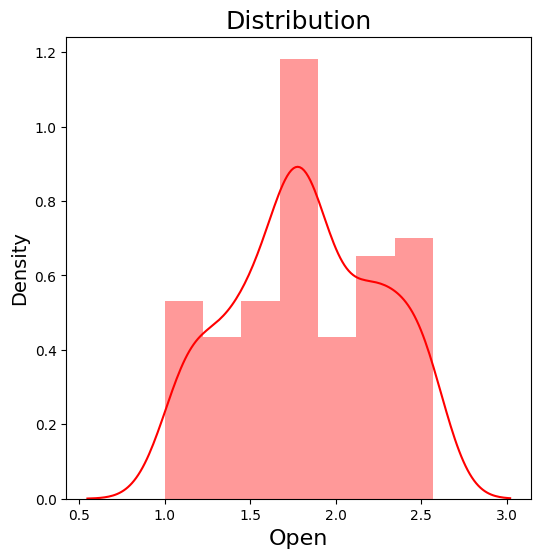

In [ ]:
# log transformation for 'open' feature

plt.figure(figsize = (6,6))
sns.distplot(np.log10(df['Open']), color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

It looks like Normally Distributed of open Feature

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

<ipython-input-12-e801f15cf26e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['High'], color = 'Red')


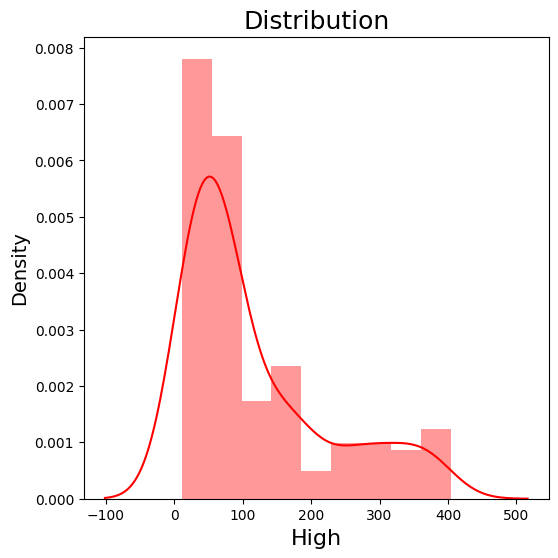

In [12]:
# ploting for Distribution of 'high' Feature

plt.figure(figsize = (6,6))
sns.distplot(df['High'], color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('High', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

It looks for numerical features are rightly skewed.

Apply log transformation to make normal.

<ipython-input-13-4939ef4f3408>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['High']), color = 'Red')


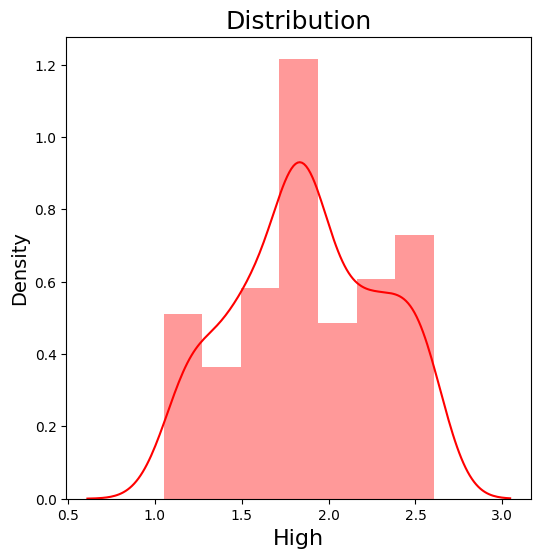

In [13]:
# Log Transformation of 'High' Feature

plt.figure(figsize = (6,6))
sns.distplot(np.log10(df['High']), color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('High', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

It looks like Normally Distributed of High Feature

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

<ipython-input-31-0b20c4cf9447>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Low'], color = 'Red')


Text(0, 0.5, 'Density')

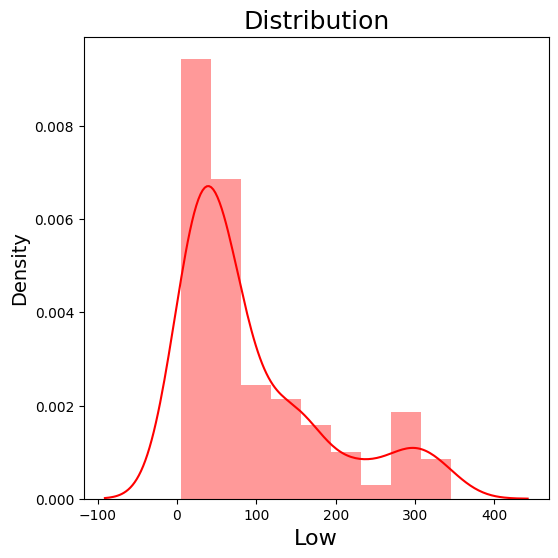

In [ ]:
# for Normal Distribution
# ploting for Distribution of 'Low' Feature

plt.figure(figsize = (6,6))
sns.distplot(df['Low'], color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Low', fontsize= 16)
plt.ylabel('Density', fontsize=14)

It looks for numerical features are rightly skewed.

Apply log transformation to make normal.

<ipython-input-32-3b26c2efa441>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['Low']), color = 'Red')


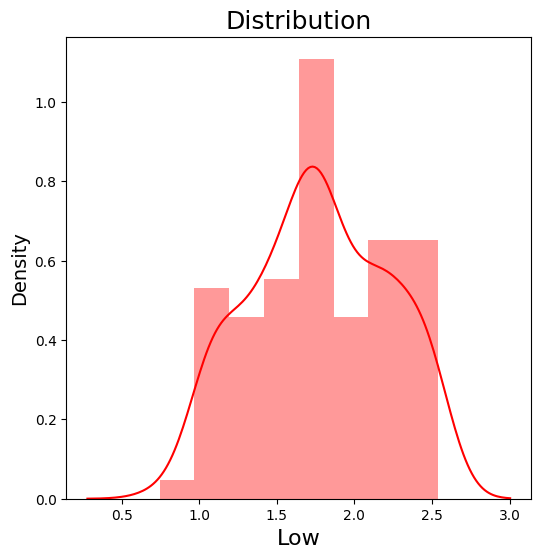

In [ ]:
# Log Transformation of 'low' feature
plt.figure(figsize = (6,6))
sns.distplot(np.log10(df['Low']), color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Low', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

It looks like Normally Distributed of Low Feature

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

# Now find out the realation between the Dependent Variable and independent Variable

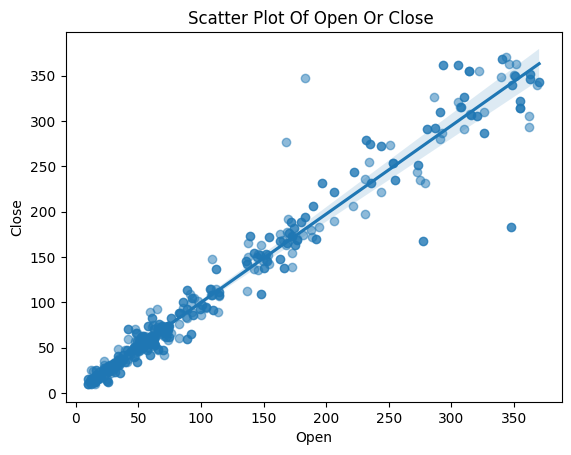

In [ ]:
# Now find out the realation between the Close and Open
# scatter plot with Best Fit line

plt.scatter(df['Close'], df['Open'], alpha=0.5)
plt.title('Scatter Plot Of Open Or Close ')
plt.xlabel('Open')
plt.ylabel('Class')
sns.regplot(x ='Open', y = 'Close', data= df)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

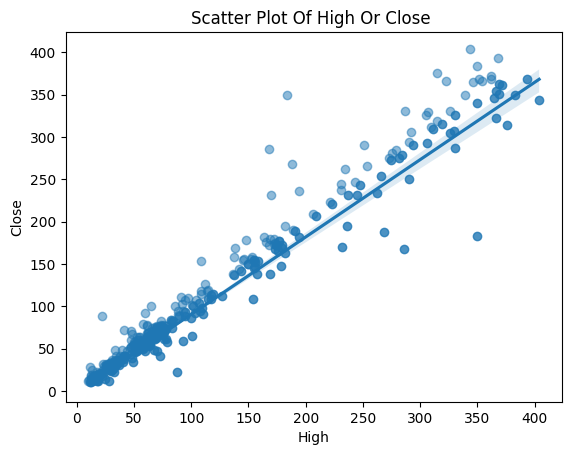

In [ ]:
# Now find out the realation between the Close and High
plt.scatter(df['Close'], df['High'], alpha=0.5)
plt.title('Scatter Plot Of High Or Close ')
plt.xlabel('Open')
plt.ylabel('Class')
sns.regplot(x ='High', y = 'Close', data= df)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

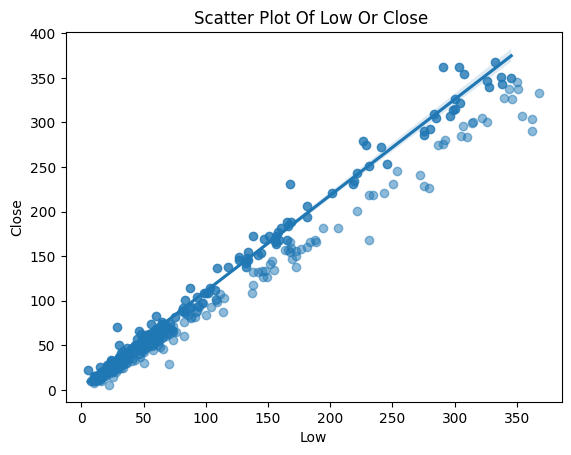

In [ ]:
# Now find out the realation between the Close and Low
plt.scatter(df['Close'], df['Low'], alpha=0.5)
plt.title('Scatter Plot Of Low Or Close ')
plt.xlabel('Low')
plt.ylabel('Class')
sns.regplot(x ='Low', y = 'Close', data= df)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

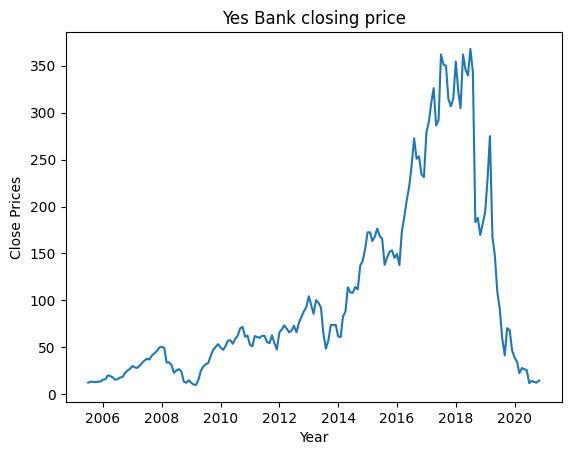

In [ ]:
#plotting close price
plt.figsize = (10,8)
plt.xlabel('Year')
plt.ylabel('Close Prices')
plt.plot(df['Date'], df['Close'])
plt.title('Yes Bank closing price')
plt.show()

As seen in above plot the trend is increasing from 2009 to 2018 but after that the trend decreases. This is because of the fraud case of involving Rana Kapoor

Closing price of stock price is always important so i take close price as dependent variable

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

# Now, we will see the correlation between all the features in our data set

<ipython-input-48-1b58bb3927b1>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=None,annot=True)


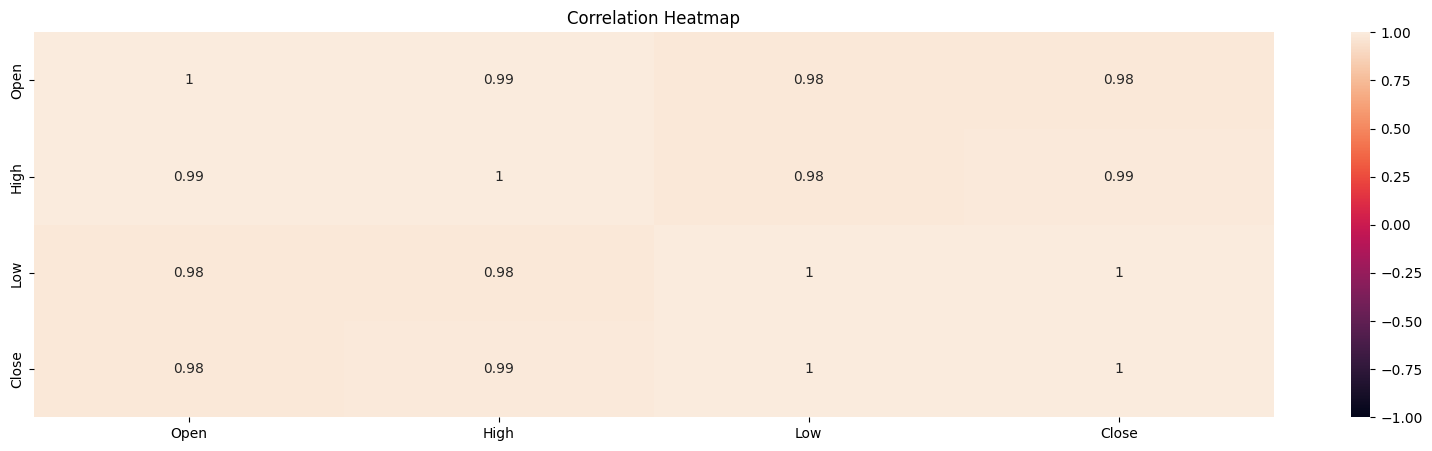

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,5))
plt.title('Correlation Heatmap')
cor = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=None,annot=True)

Every feature is extremely corelated with each other, so taking just one feature or average of these features would suffice for our regression model as linear regression assumes there is no multi colinearity in the features.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

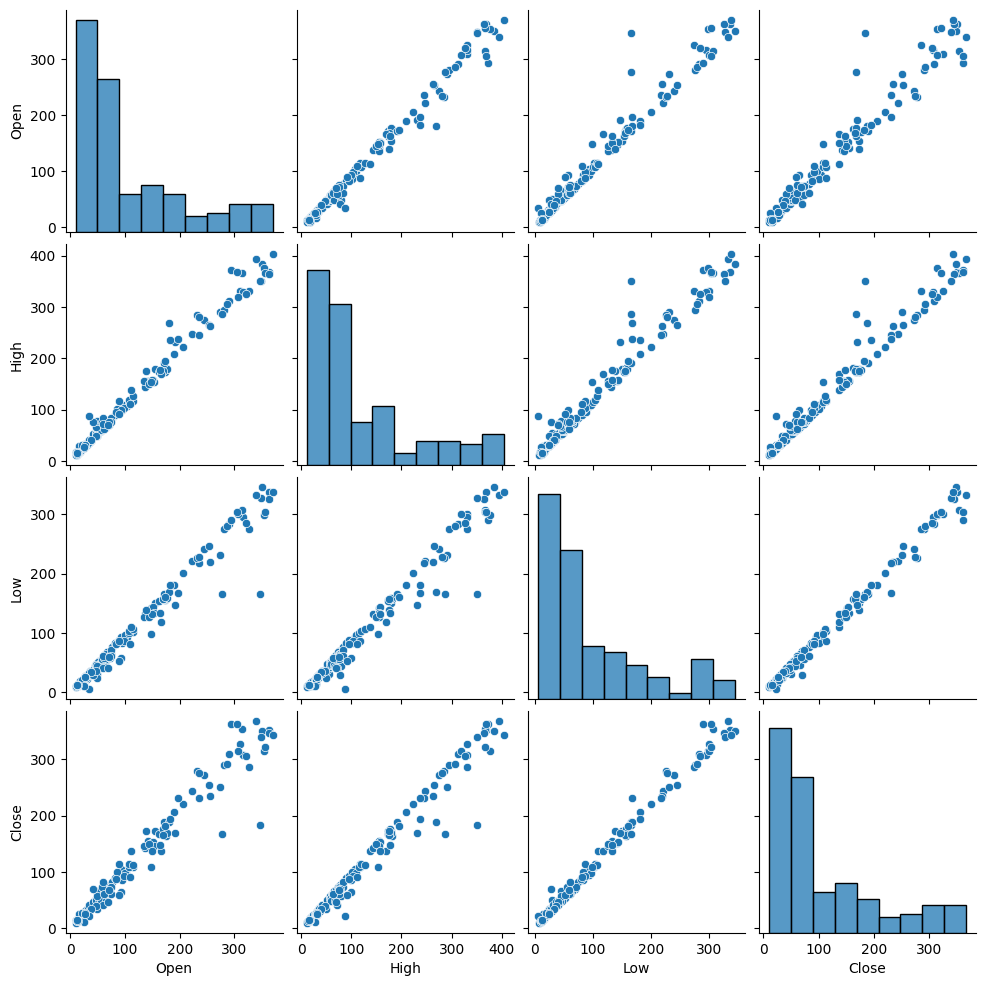

In [14]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

<Axes: >

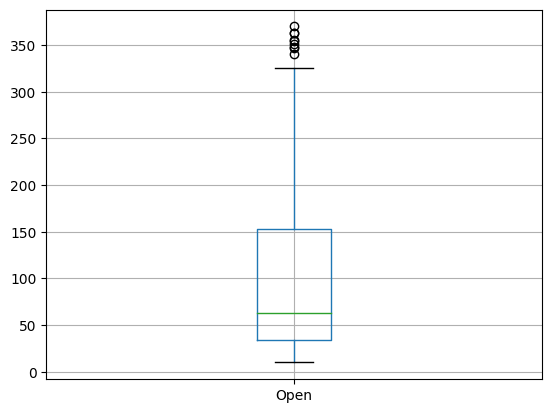

In [15]:
# Handling Outliers & Outlier treatments
# Handling Outliers & Outlier treatments
df.boxplot('Open')

In [21]:
fig = px.box(np.log10(df['Open']))
fig.update_layout(xaxis=dict(title='boxplot'))
fig.show()

<Axes: >

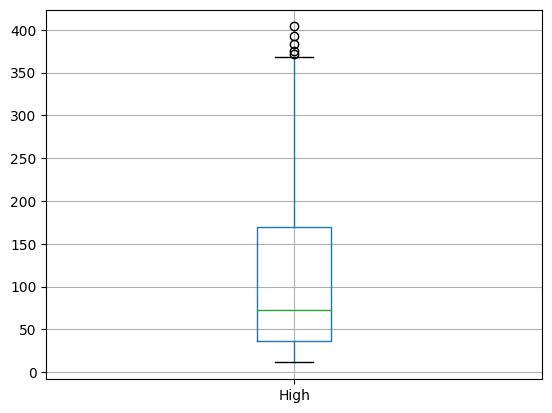

In [18]:
df.boxplot('High')

In [22]:
fig = px.box(np.log10(df['High']))
fig.update_layout(xaxis=dict(title='boxplot'))
fig.show()

<Axes: >

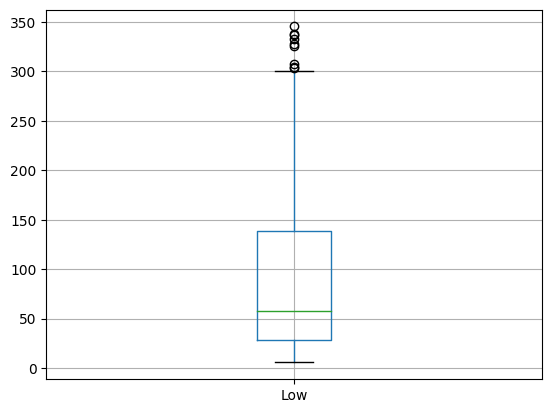

In [23]:
df.boxplot('Low')

In [24]:
fig = px.box(np.log10(df['Low']))
fig.update_layout(xaxis=dict(title='boxplot'))
fig.show()

<Axes: >

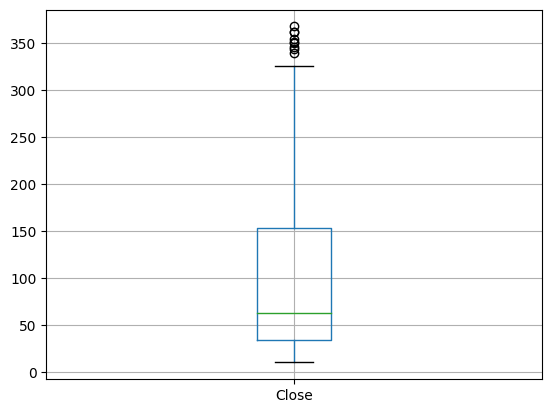

In [25]:
df.boxplot('Close')

In [26]:
fig = px.box(np.log10(df['Low']))
fig.update_layout(xaxis=dict(title='boxplot'))
fig.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

We used Log 10 to treat the outliers because the outlier is much high to manupulate the data and it is less in number

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [27]:
# Manipulate Features to minimize feature correlation and create new features
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


#### 2. Feature Selection

In [40]:
# Select your features wisely to avoid overfitting
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
# Create Ridge regression model
ridge = Ridge(alpha=0.5)

In [49]:
# Perform cross-validation
cv_scores = cross_val_score(ridge, X_scaled, y, cv=5, scoring='r2')

In [50]:
# Compute average R-squared score
avg_r2 = cv_scores.mean()

In [51]:
print("Average R-squared score:", avg_r2)

Average R-squared score: -0.608238206054701


# Feature Scaling

In [45]:
# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [32]:
# Transform Your data
X = df.drop(columns=['Close','Date'])
y = df['Close']

### 6. Data Scaling

In [33]:

# Normalization
from scipy.stats import zscore
X = X.apply(zscore)
y = np.log10(y)

In [46]:

#checking shape of training dataset.
X_train.shape

(148, 3)

In [47]:
#checking shape of testing dataset.
X_test.shape

(37, 3)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [44]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1
### Implementing  Lasso Regression

In [59]:
lasso = Lasso(alpha=0.005, max_iter = 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.005, max_iter=3000)

In [60]:
# prediction of train data
y_pred_lasso = lasso.predict(X_test)
y_pred_lasso


array([1.53054895, 1.47298071, 2.83401266, 1.89809247, 2.63685933,
       1.49798992, 1.56303993, 1.64158112, 2.05381427, 1.65829809,
       1.63273556, 2.20853854, 1.66590377, 1.55969864, 1.46841987,
       1.51207847, 1.58932116, 1.52197472, 1.66755795, 1.60835101,
       2.30370792, 2.00406436, 2.83785041, 1.58361886, 1.49018602,
       1.95487457, 1.63706959, 1.53409179, 1.638129  , 1.97932892,
       1.63572874, 1.60213292, 2.07538063, 2.41251718, 1.63557658,
       1.60799955, 1.60334222])

In [62]:
np.array(y_test)


array([1.45682135, 1.08778142, 2.56572979, 2.13618133, 2.48685536,
       1.35755372, 1.57898284, 1.79225157, 2.22520587, 1.75966784,
       1.68708284, 2.36398783, 1.7854722 , 1.53844805, 1.18892848,
       1.4034637 , 1.67495295, 1.3588862 , 1.81967552, 1.70731463,
       2.22530928, 2.18554215, 2.54406804, 1.70363524, 1.28981184,
       2.17429246, 1.7707784 , 1.47943134, 1.61752453, 2.18912521,
       1.79865065, 1.67504474, 2.22685757, 2.40401223, 1.72090317,
       1.69731654, 1.35121635])

Evaluation Metrics of Lasso Regression:-

In [63]:
# Test Performance of lasso regression model

print("MSE :",round(mean_squared_error(y_test, y_pred_lasso), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso),4))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 4))

MSE : 0.0274
RMSE : 0.1655
MAE : 0.1424
MAPE : 0.0836
R2 : 0.8232


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

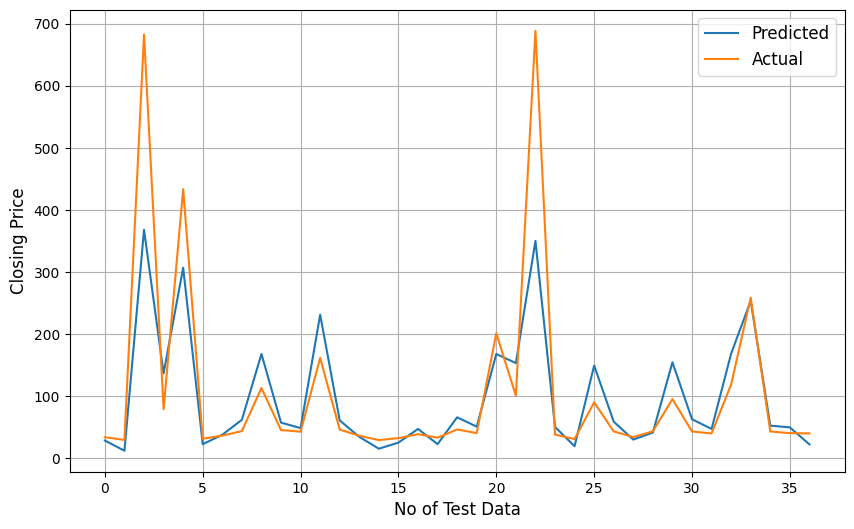

In [64]:
# Visualizing evaluation Metric Score chart
# Actual Price vs. Predicted Price for Lasso Regression Plotting
# Actual price vs predicted price for lasso regression ploting
plt.figure(figsize= (10,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.legend(['Predicted', 'Actual'], fontsize = 12)
plt.xlabel('No of Test Data', fontsize= 12)
plt.ylabel('Closing Price', fontsize = 12)
plt.grid()

#### 2. Cross- Validation & Hyperparameter Tuning

In [66]:
lasso =Lasso()
parameters ={'alpha': [1e-15, 1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [67]:
# Test performance

print("MSE :", round(mean_squared_error(y_test, y_pred_lasso), 4))
print("RMSE :", round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)), 4))
print("MAE :", round(mean_absolute_error(y_test, y_pred_lasso), 4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso), 4))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 4))

MSE : 0.0274
RMSE : 0.1655
MAE : 0.1424
MAPE : 0.0836
R2 : 0.8232


In [68]:
# Prediction of test data .
y_pred_lasso1 = lasso_regressor.predict(X_test)
y_pred_lasso


array([1.53054895, 1.47298071, 2.83401266, 1.89809247, 2.63685933,
       1.49798992, 1.56303993, 1.64158112, 2.05381427, 1.65829809,
       1.63273556, 2.20853854, 1.66590377, 1.55969864, 1.46841987,
       1.51207847, 1.58932116, 1.52197472, 1.66755795, 1.60835101,
       2.30370792, 2.00406436, 2.83785041, 1.58361886, 1.49018602,
       1.95487457, 1.63706959, 1.53409179, 1.638129  , 1.97932892,
       1.63572874, 1.60213292, 2.07538063, 2.41251718, 1.63557658,
       1.60799955, 1.60334222])

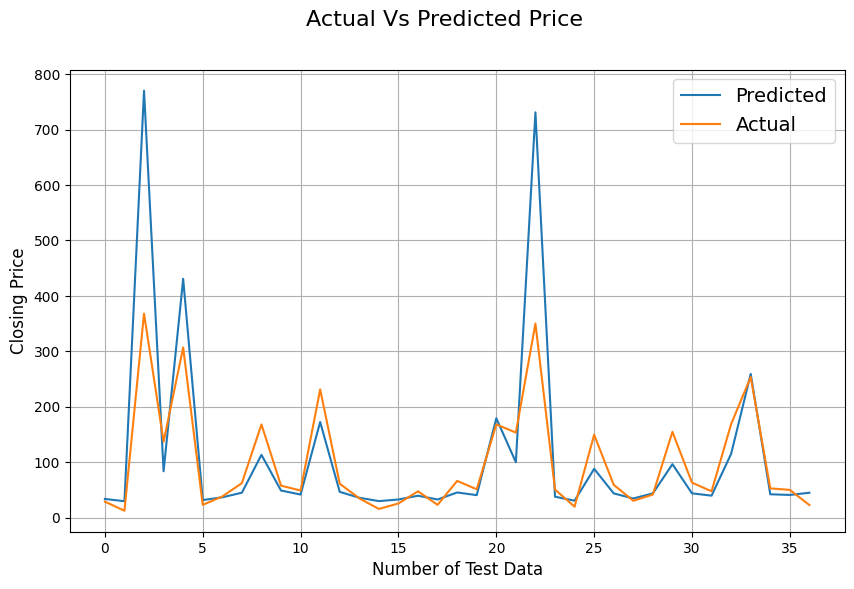

In [69]:
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred_lasso1))
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Price', fontsize= 16)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('Number of Test Data', fontsize =12)
plt.ylabel('Closing Price', fontsize =12)
plt.grid()

##### Which hyperparameter optimization technique have you used and why?

Grid search exhaustively searches the entire hyperparameter space by specifying a list of possible values for each hyperparameter. It performs a complete search and evaluates the model performance for each combination of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Based on these metrics, it seems that there is no significant improvement after applying cross-validation.

### ML Model - Ridge Regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [70]:
# Visualizing evaluation Metric Score chart
# fitting data into ridge regression

ridge_reg = Ridge(alpha=0.01)
ridge_reg_model = ridge_reg.fit(X_train,y_train)

In [71]:
#accuracy of lasso regression model
round(ridge_reg.score(X_train,y_train),4)

0.8167

In [72]:
#prediction of test data.
y_pred_ridge = ridge_reg.predict(X_test)

In [73]:

# Test Performance of ridge regression model
print("MSE :",round(mean_squared_error(y_test, y_pred_ridge), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_ridge)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_ridge),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_ridge),3))
print("R2 :",round(r2_score(y_test, y_pred_ridge), 3))

MSE : 0.029
RMSE : 0.17
MAE : 0.143
MAPE : 0.084
R2 : 0.814


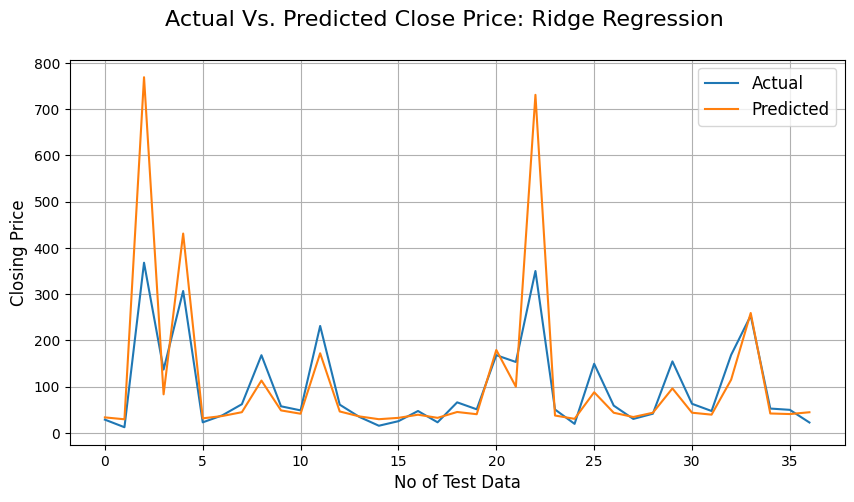

In [74]:

# Actual Price vs. Predicted Price for Ridge Regression Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge))
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

#### 2. Cross- Validation & Hyperparameter Tuning

In [75]:
# Hyper-Parameter Tuning for Lasso Regression

ridge_cv = Ridge()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_model_cv = GridSearchCV(ridge_cv, parameters,scoring = 'neg_mean_squared_error',cv = 3)

In [76]:
ridge_model_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [78]:
#prediction of test data.
y_pred_ridge_cv = ridge_model_cv.predict(X_test)


Evaluation Metrics of Ridge Regression:-

In [79]:
# Test Performance of ridge regression model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_ridge_cv), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_ridge_cv)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_ridge_cv),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_ridge_cv),3))
print("R2 :",round(r2_score(y_test, y_pred_ridge_cv), 3))

MSE : 0.029
RMSE : 0.169
MAE : 0.143
MAPE : 0.084
R2 : 0.816


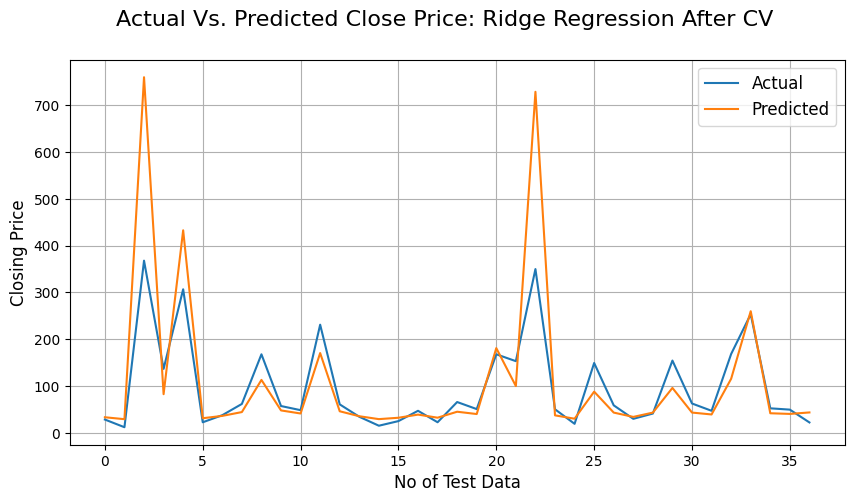

In [80]:
# Actual Price vs. Predicted Price for Ridge Regression after Validation Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_ridge_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Ridge Regression After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

##### Which hyperparameter optimization technique have you used and why?

Grid search exhaustively searches the entire hyperparameter space by specifying a list of possible values for each hyperparameter. It performs a complete search and evaluates the model performance for each combination of hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

there is a slight improvement in the R2 score after cross-validation, but the other metrics either remained the same or showed a slight degradation.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Mean Squared Error (MSE):

A lower MSE suggests that the model is making more accurate predictions, which can be valuable for decision-making and resource allocation in various business applications, such as financial forecasting, demand prediction, or risk assessment.

Root Mean Squared Error (RMSE):

A lower RMSE implies that the model's predictions have smaller average errors, which can lead to improved decision-making, reduced financial losses, and enhanced efficiency in business processes.

Mean Absolute Error (MAE):

MAE helps assess the magnitude of errors in the model's predictions. A lower MAE indicates that, on average, the model's predictions are closer to the true values. This can be crucial for applications where minimizing errors is essential, such as pricing models, quality control, or demand forecasting.

Mean Absolute Percentage Error (MAPE):

MAPE is valuable when the relative magnitude of errors is important. A lower MAPE suggests that the model's predictions are closer to the actual values, which can enhance decision-making accuracy and improve resource allocation in various business domains, such as sales forecasting, inventory management, or production planning.

R-squared (R2):

R2 helps assess the model's explanatory power and its ability to capture the underlying patterns in the data. A higher R2 signifies that the model accounts for a larger proportion of the variability, indicating its effectiveness in predicting outcomes and supporting decision-making processes.

In [87]:
# set up the model pipeline
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data,
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=cv,
        n_jobs=-1,
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)

    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)

    return fitted_model, pred


### ML Model - Implementing Random Forest Regressor

In [88]:
# initialize and fit random forests regressor
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [100,150,200],
     'max_depth': [20,30,50,100]
}
start = datetime.now()
model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model,
                                 param_grid, cv=tscv)
end = datetime.now()
execution_time = round((end - start).seconds/60,2)
print(f'The computational cost for finding the best fit random forest regressor model: {execution_time} minutes\n')
# Root Mean Squared Error
print(f'Best score: {np.sqrt(-model.best_score_)}\n')
print(f'Best parameters: {model.best_params_}')

NameError: ignored

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***